In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/'My Drive'/LuanVan

/content/drive/My Drive/LuanVan


In [ ]:
!unzip /content/drive/'My Drive'/LuanVan/data.zip

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 13677, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13677 (delta 0), reused 0 (delta 0), pack-reused 13673
Receiving objects: 100% (13677/13677), 12.11 MiB | 6.92 MiB/s, done.
Resolving deltas: 100% (9561/9561), done.


In [ ]:
%cd /content/drive/'My Drive'/LuanVan/yolov5

/content/drive/My Drive/LuanVan/yolov5


In [ ]:
!pip install -r requirements.txt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 31.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!/content/drive/MyDrive/LuanVanCNTT/yolov5/weights/download_weights.sh

/bin/bash: /content/drive/MyDrive/LuanVanCNTT/yolov5/weights/download_weights.sh: /bin/bash: bad interpreter: Permission denied


In [ ]:
!python train.py --img 640 --batch 8 --epochs 10 --data /content/drive/MyDrive/LuanVan/yolov5/data/coco128.yaml  --weights weights/yolov5s.pt

In [ ]:
from IPython.display import Image, clear_output

In [ ]:
!python detect.py --source /content/drive/MyDrive/LuanVan/data/images/val --weights /content/drive/MyDrive/LuanVan/yolov5/runs/train/exp2/weights/last.pt  --img 640 --save-txt --save-conf

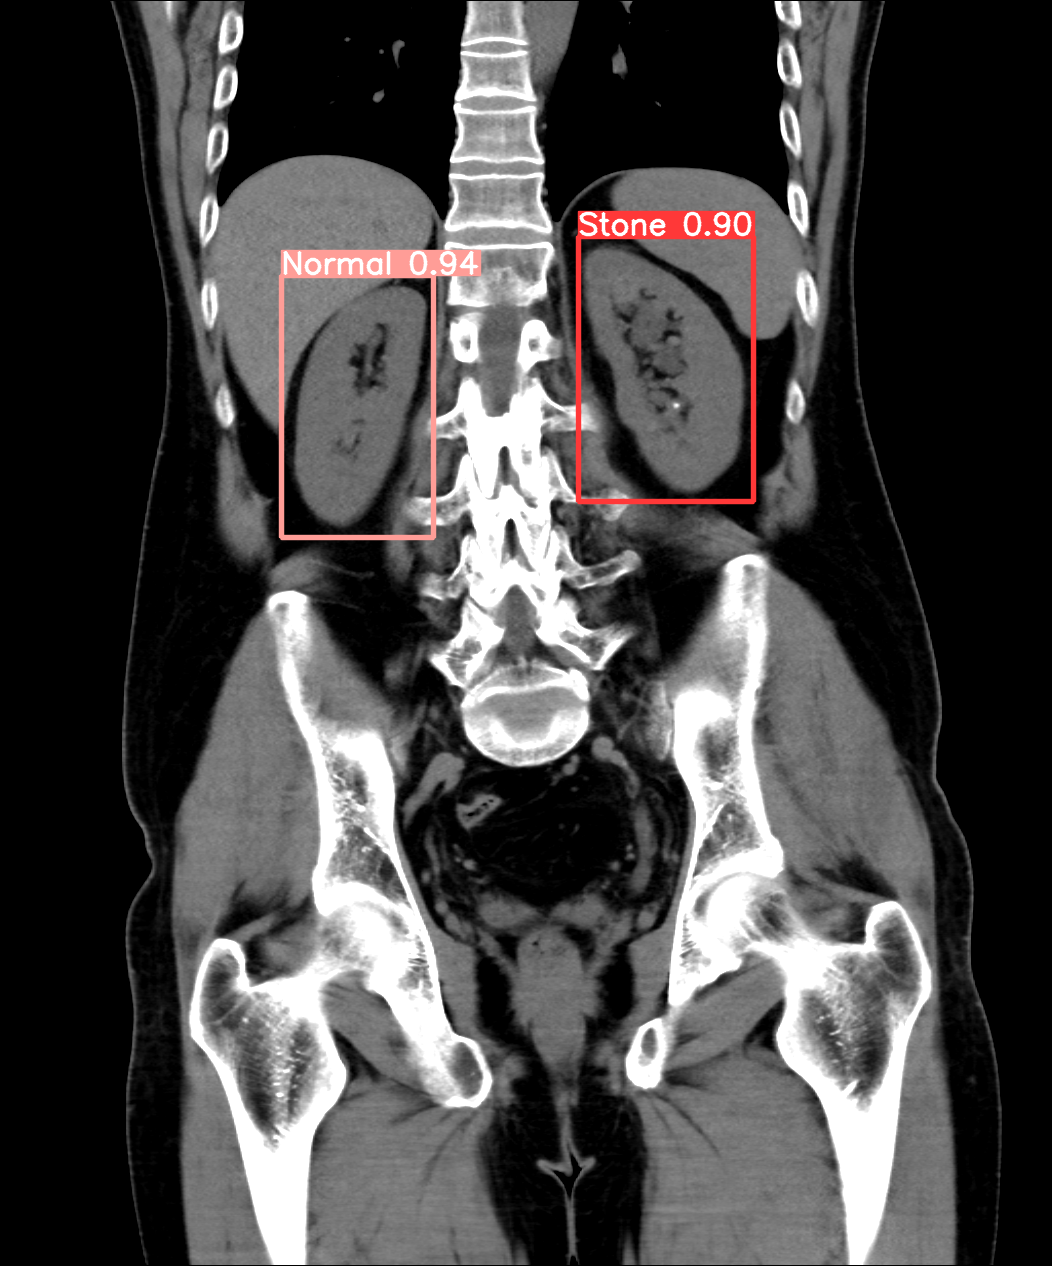

In [ ]:
Image(filename='/content/drive/MyDrive/LuanVan/yolov5/runs/detect/exp/Kidney_stone626.png', width=440)

In [ ]:
!python detect.py --source /content/drive/MyDrive/LuanVan/data/images/test/ --weights /content/drive/MyDrive/LuanVan/yolov5/runs/train/exp2/weights/last.pt  --img 640 --save-txt --save-conf

detect: weights=['/content/drive/MyDrive/LuanVan/yolov5/runs/train/exp2/weights/last.pt'], source=/content/drive/MyDrive/LuanVan/data/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-208-g15057d2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/30 /content/drive/MyDrive/LuanVan/data/images/test/Kidney_stone1.png: 640x512 1 Stone, 1 Normal, Done. (0.016s)
image 2/30 /content/drive/MyDrive/LuanVan/data/images/test/Kidney_stone10.png: 640x640 2 Stones, Done. (0.013s)
image 3/30 /content/drive/MyDrive/LuanVan/data/images/test/Kid

In [ ]:
import numpy as np
import cv2
import torch

##load model

In [ ]:
model = torch.hub.load('/content/drive/MyDrive/LuanVan/yolov5', 'custom', path='/content/drive/MyDrive/LuanVan/yolov5/runs/train/exp2/weights/best.pt', source='local')

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/drive/MyDrive/LuanVan/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-208-g15057d2 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


##load images

In [ ]:
import os
import shutil

FJoin = os.path.join

def GetFiles(path):
    """Output: file_list là danh sách tất cả các file trong path và trong tất cả các
       thư mục con bên trong nó. dir_list là danh sách tất cả các thư mục con
       của nó. Các output đều chứa đường dẫn đầy đủ."""

    file_list, dir_list = [], []
    for dir, subdirs, files in os.walk(path):
        file_list.extend([FJoin(dir, f) for f in files])
        dir_list.extend([FJoin(dir, d) for d in subdirs])
    return file_list, dir_list

#Cắt ảnh theo tọa độ

In [ ]:
root_path='/content/drive/MyDrive/LuanVan/data_kidney_stone_detection/images/val/'
files, dirs = GetFiles(os.path.expanduser(root_path))
for file in files:
    print(file)
    i = 1
    #f = open(file, 'r')
    #line1 = f.read()
    filename=file[70:-4]
    frame = cv2.imread(file)
    dim = (640, 640)  
    resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    detections = model(resized)
    #print result
    results = detections.pandas().xyxy[0].to_dict(orient="records")
    x = np.array(results)
    #print(x)
    #filter
    for result in results:
        confi = results[0]['confidence']
        name = results[0]['name']
        clas =results[0]['class']
        if clas == 0 :
            x1 = int(results[0]['xmin'])
            y1 = int(results[0]['ymin'])
            x2 = int(results[0]['xmax'])
            y2 = int(results[0]['ymax'])
            #print(x1,y1,x2,y2)
            cv2.rectangle(resized, (x1,y1), (x2,y2), (0,0,0), 1)
            cv2.putText(frame, name, (x1+3, y1-10), cv2.FONT_HERSHEY_DUPLEX, 1, (60, 255, 255), 1)
            crop = resized[ y1:y2, x1:x2] 
            #print(crop.shape)
            cv2.imwrite("/content/drive/MyDrive/LuanVan/data_kidney_stone_detection/cut-images/test3/"+f"{filename}_{i}.jpg",crop)
            i=i+1


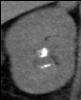

In [ ]:
Image(filename='/content/drive/MyDrive/LuanVan/data_kidney_stone_detection/cut-images/test3/Kidney_stone627_1.jpg', width=240)

#phát hiện một ảnh mới

image 1/1: 998x1034 2 Stones
Speed: 5.1ms pre-process, 17.2ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)


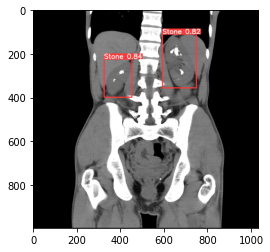

In [ ]:
import torch
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img = os.path.join('/content/drive/MyDrive/LuanVan/data/images/test/Kidney_stone12.png')
img = cv2.imread(img)
# cv2_imshow(img)
results = model(img)
results.print()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()